In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.special import gammaln
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

In [2]:
Rdata_path = "data.RData"
# Rdataを読み込み
result = pyreadr.read_r(Rdata_path)
# dataは個体に対しての種子数のカウント数
data = result["data"]

<h1>2.1 例題：種子数の統計モデリング</>

ここでは植物50個体の各個体の種子数を数えたものがデータだとします<br>
このデータを解析して確率分布や統計モデルについて説明する

In [3]:
print(data[:10])

   data
0   2.0
1   2.0
2   4.0
3   6.0
4   4.0
5   5.0
6   2.0
7   3.0
8   1.0
9   2.0


このデータは0個、1個、2個などと数えられるカウントデータである

In [4]:
print(f"data size: {len(data)}")

data size: 50


データ数は50個である

In [5]:
# データの概要を表示
data.describe()

,data
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


min、maxはそれぞれこのデータ中の最小値、最大値。<br>
25％、50％、75％はそれぞれデータを小さい順に並べた時の25％、50％点、75％点である50％点は中央値とも呼ばれる<br>
meanは標本平均でここでは3.56<br>
stdはデータのばらつきを表す

データ解析で最も重要なのはそのデータを様々な方法で図示してみること。<br>
たとえば、「趣旨を5個持つ植物は50個体のうち何個体だったのか？」といった度数分布を図示してみるとデータ解析の役にたちそう。

In [6]:
# 度数分布を表示
data.value_counts().sort_index()

data
0.0      1
1.0      3
2.0     11
3.0     12
4.0     10
5.0      5
6.0      4
7.0      4
Name: count, dtype: int64

これを見ると、種子数5は5個体、種子数6は4個体ということがわかる。<br>
これをヒストグラムとして図示してみる。

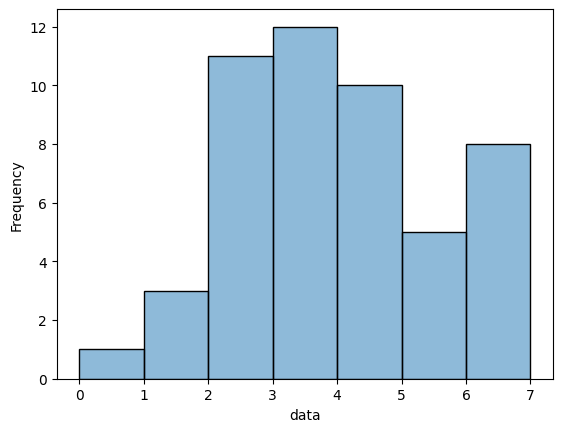

In [7]:
# 種子数をヒストグラムで表示
sns.histplot(data)
plt.xlabel("data")
plt.ylabel("Frequency")
plt.legend([], [], frameon=False)  # 凡例を非表示にする
plt.show()

<h1>2.2 データと確率分布の対応関係をながめる</>

ここまで種子数データを調べて以下の特徴があった<br>
・1個、2個と数えられるカウントデータ<br>
・1個体の趣旨数の標本平均は3.56個<br>
・個体ごとに種子数のばらつきがあり、ヒストグラムを見るとひと山の分布になる<br>


データにみられるこのようなばらつきを表すために、確率分布を使う。<br>
種子数データを統計モデルとして表現するために今回はポアソン分布を当てはめて分析してみる。<br>


確率分布とは確率変数の値とそれが出現する確率を対応させたもの。<br>
確率変数とは、ある植物個体iの種子数を$y_i$として個体ごとにばらつく変数<br>
各$y_i$をとる確率はどれくらいなのか？というところに興味がある。<br>
今回の例題だと「個体1の種子数$y_i$=2となる確率はどれぐらいか？」をポアソン分布で表現する<br>
この分布はパラーメータの値に依存して「分布の形」が変わる。<br>
ポアソン分布のパラメータは分布の平均のみである。「平均3.56のポアソン分布」を図示してみる

In [8]:
# 平均3.56のポアソン分布に従うデータを作成
y = np.arange(0, 10)  # 0〜9の範囲
pmf = poisson.pmf(y, 3.56)
poisson_data = pd.DataFrame({"y":y,"prob":pmf})
print(poisson_data)

   y      prob
0  0  0.028439
1  1  0.101242
2  2  0.180211
3  3  0.213851
4  4  0.190327
5  5  0.135513
6  6  0.080404
7  7  0.040891
8  8  0.018197
9  9  0.007198


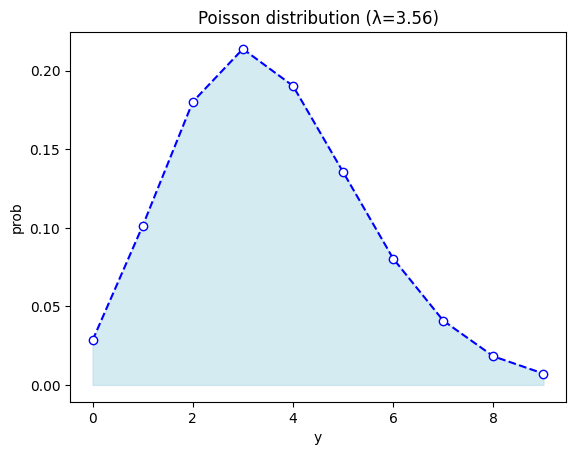

In [9]:
# 平均3.56のポアソン分布の各度数に対しての生起確率を表示
plt.plot(poisson_data["y"],poisson_data["prob"], color='blue',marker='o',linestyle='--',
         markerfacecolor='white', markeredgecolor='blue', markersize=6)
plt.fill_between(poisson_data["y"],poisson_data["prob"], color='lightblue', alpha=0.5) # 下部分の面積を薄く塗りつぶす
plt.xlabel("y")
plt.ylabel("prob")
plt.title("Poisson distribution (λ=3.56)")
plt.show()

ここでは種子数の個体間のばらつきを表す近似的な表現手法としてポアソン分布を使っている。<br>
平均3.56のポアソン分布では種子数が0である確率は0.03、一番確立が高くなるのは種子数が3である場合で、その確率は0.21となる。<br>
こういった現象を表現したければ、平均3.56のポアソン分布を持ち出せばよいのではないか?というアイディア

観測データのヒストグラムに平均3.56のポアソン分布を重ねてみる

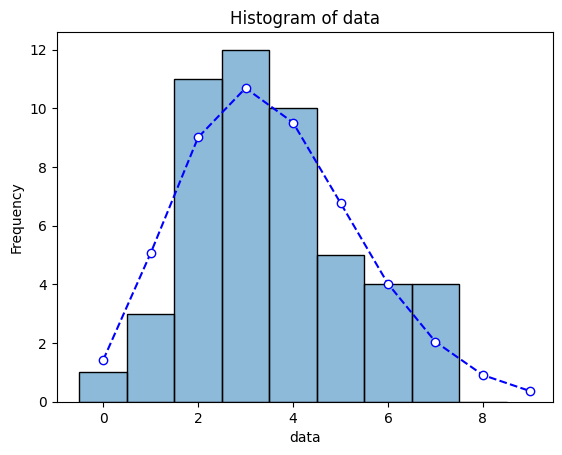

In [10]:
# 種子数の各度数をヒストグラムで表示
sns.histplot(data-0.5,stat="count",bins=np.arange(-0.5, int(np.max(data)) + 2)) # 見やすくするために0.5ずらす
# 平均3.56のポアソン分布の各度数を表示
plt.plot(poisson_data["y"],poisson_data["prob"]*len(data), color='blue',marker='o',linestyle='--',
         markerfacecolor='white', markeredgecolor='blue', markersize=6)
plt.xlabel("data")
plt.ylabel("Frequency")
plt.title("Histogram of data")
plt.legend([], [], frameon=False)  # 凡例を非表示にする
plt.show()

図を見ると観測されたばらつきがポアソン分布で表現できている？ように見える<br>
この「図の見た目」による納得気分をもう少し定量的に示したい。<br>
特に興味があるのは、<br>
・どのような確率分布、あるいは統計モデルを使って観測データを説明できるのか<br>
・確率分布のパラメータはどのように決めればよいのか<br>
・観測データを説明できる良い統計モデルは何か<br>
である

<h1>2.3 ポアソン分布とは？</h1>

ポアソン分布の確立分布は以下のように定義される<br>
$p(y|λ)=\frac{λ^yexp(-λ)}{y!}$<br>
この$p(y|λ)$は平均がλであるときに、ポアソン分布が$y$になる確率。<br>
平均λはポアソン分布のパラメータであり、ポアソン分布には以下の特徴がある。<br>
・確率分布の平均はλである(λ>=0)<br>
・平均と分散は等しい<br>


以下様々なλのポアソン分布

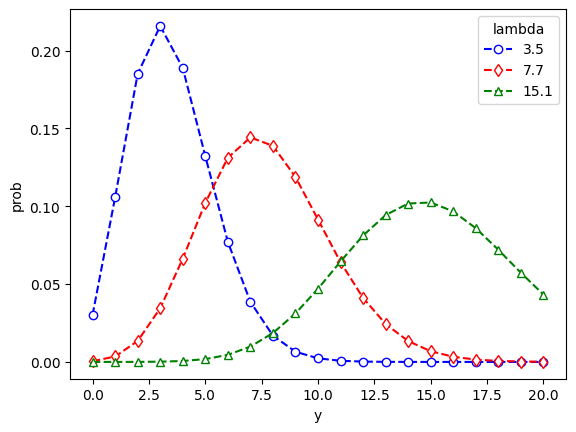

In [11]:
# 様々なλのポアソン分布の各度数に対しての生起確率を表示
params =[3.5,7.7,15.1]
markers = ["o","d","^"]
colors = ["blue","red","green"]
for i in range(len(params)):
  y = np.arange(0, 21)  # 0〜20の範囲
  pmf = poisson.pmf(y, params[i])
  poisson_data = pd.DataFrame({"y":y,"prob":pmf})
  plt.plot(poisson_data["y"],poisson_data["prob"], color=colors[i],marker=markers[i],linestyle='--',
           markerfacecolor='white', markeredgecolor=colors[i], markersize=6,
           label=f"{params[i]}")
plt.xlabel("y")
plt.ylabel("prob")
plt.legend(title="lambda")
plt.show()

なぜこの種子数のばらつきの統計モデルにポアソン分布が選ばれたのでしょうか？<br>
(1) データに含まれている値$y_i$が{0,1,2,…}のような非負の整数<br>
(2) $y_i$の下限は0だけど上限はわからない(∞を仮定)<br>
(3) この観測データでは平均と分散が大体等しい<br>

この例題のように平均λのポアソン分布を用いて統計モデルを作るためにはいくつかの前提が必要<br>
・どの個体でも種子数の平均は同じで、個体ごとの違いない<br>
・個体同士は独立であり個体間の相関や交互作用がない<br>

<h1>2.4 ポアソン分布のパラメータの最尤推定</h1>

確率分布のパラメータを観測データに基づいて、推定する方法の一つとして最尤推定法がある。<br>
最尤推定法は尤度なる「あてはまりのよさ」を表す統計量を最大にするパラメータの値を探そうとするパラメータ推定方法。<br>
尤度の実態はとあるλを固定して全ての個体iについての$p(y_i|λ)$の積である。<br>
尤度関数を$L(λ)$とすると、<br>
$L(λ)=p(y_1|λ)*p(y_2|λ)*p(y_3|λ)*…*p(y_n|λ) = Πp(y_i|λ)$となって<br>
ポアソン分布の場合は$L(λ)=\prod\frac{λ^{y_i}exp(-λ)}{y_i!}$となる<br>
なぜ積なのかというとn個の事象が同時に起こった確率を計算したいから

この$L(λ)$を扱いやすいように対数変換してみると<br>
$log(L(λ))=\sum(y_ilog(λ)-λ-\sum_{i=1}^n log(k))$となる<br>
以下様々な$λとlogL$

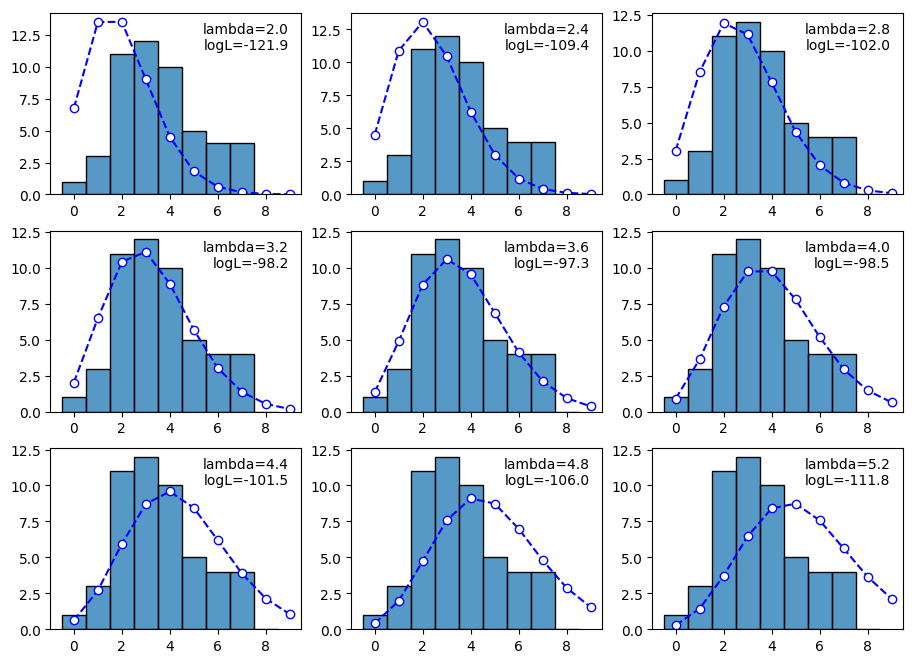

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(11, 8))  # 3x3
axes = axes.flatten()  # 2次元配列を1次元にしてループしやすくする
params=np.arange(2.0,5.21,0.4) # 2.0から5.2まで9個のλで試す
y = np.arange(0, 10)  # 0〜9の範囲

for ax, param in zip(axes, params):
  # 種子数の各度数をヒストグラムで表示
  sns.histplot(data["data"]-0.5,stat="count",bins=np.arange(-0.5, int(np.max(data)) + 2), ax=ax) # 見やすくするために0.5ずらす
  # 各λに合わせてポアソン分布をあてはめ
  pmf = poisson.pmf(y, param)
  poisson_data = pd.DataFrame({"y":y,"prob":pmf})
  # 対数尤度の計算
  log_likelihood = np.sum(data["data"] * np.log(param) - param - gammaln(data["data"] + 1))

  ax.plot(poisson_data["y"],poisson_data["prob"]*len(data), color='blue',marker='o',linestyle='--',
          markerfacecolor='white', markeredgecolor='blue', markersize=6)
  ax.set_xlabel("")
  ax.set_ylabel("")

  ax.text(x=0.95,y=0.95,
          s=f"lambda={param:.1f}\nlogL={log_likelihood:.1f}",
          transform=ax.transAxes,  # 0-1の軸座標,
          horizontalalignment="right",
          verticalalignment="top")

plt.show()

図を見ると対数尤度が大きいほど、「観測データとポアソン分布が似ている」ように見えます。<br>
さらに対数尤度$logLとλ$の関係を調べるために以下の図を見てみると

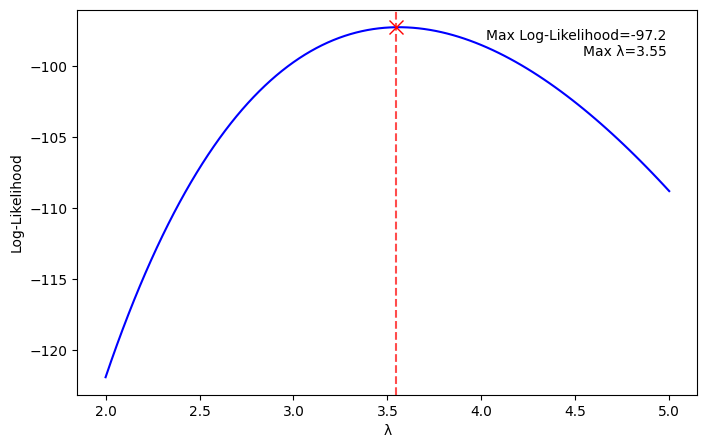

In [13]:
# λの範囲
lambdas = np.linspace(2,5,100)
# 対数尤度を計算
log_likelihoods = [np.sum(data["data"] * np.log(lam) - lam - gammaln(data["data"] + 1)) for lam in lambdas]
# 最大対数尤度とそれに対応するλを求める
max_idx = np.argmax(log_likelihoods)
max_lambda = lambdas[max_idx]
max_logL = log_likelihoods[max_idx]

plt.figure(figsize=(8,5))
# グラフ
plt.plot(lambdas, log_likelihoods, color="blue")
# 最大対数尤度の点に印をつける
plt.plot(max_lambda, max_logL, marker='x', color='red', markersize=10, label='MLE')
# 最大対数尤度の点から縦線を引く
plt.axvline(x=max_lambda, color='red', linestyle='--', alpha=0.7)

plt.text(x=0.95,y=0.95,
         s=f"Max Log-Likelihood={max_logL:.1f}\nMax λ={max_lambda:.2f}",
         transform=plt.gca().transAxes,
         horizontalalignment="right",
         verticalalignment="top"
         )
plt.xlabel("λ")
plt.ylabel('Log-Likelihood')
plt.show()

この例題の場合、$λ$=3.55において対数尤度が最大になる。<br>
なお、対数尤度$logL$は尤度$L$において単調増加関数なので、対数尤度が最大になる$λ$は、尤度においても最大になる。<br>

対数尤度が最大になる$λを\hat{λ}$とする。<br>
対数尤度関数が最大値で傾きが0になる$λ$を探し出せばよく、<br>
対数尤度関数$logL$をパラメータ$λ$で偏微分して0と置くことで、尤度が最大になる$\hat{λ}$を求めることができる<br>
$\frac{\partial logL(λ)}{\partial λ}=\sum_i \{\frac{y_i}{λ-1}\}=\frac{1}{λ}\sum_i {y_i}-50=0$<br>
を$λ$について解くと<br>
$\hatλ=\frac{1}{50}\sum_iy_i$となってデータの標本平均と一致するが一般的にはそうではない<br>
<br>
対数尤度が最大になる$λ$を最尤推定量という<br>
最尤推定量に実際に各$y_i$を代入して求めた$\hatλ$を最尤推定値という

実際のデータ解析で使う統計モデルはもっと複雑なので、こんなに簡単に最尤推定量を導出できない。<br>
そこで計算機を使って最尤推定値に近い値を探し出す。

<h2>2.4.1 疑似乱数と最尤推定値のばらつき</h2>

計算機に発生させる乱数は真の意味での乱数ではなく、疑似乱数と呼ばれる<br>
この例題の架空データについていうと、平均値が3.5であるポアソン分布から乱数を発生させました。<br>
乱数発生関数が生成する乱数列は毎回異なる。<br>
したがって50個のポアソン乱数の標本平均も施行ごとに異なり、ポアソン分布を当てはめた際の最尤推定値$\hatλ$も異なる<br>
ポアソン乱数によってデータを生成し、最尤推定値を評価して記録する。<br>
これを3000回繰り返した結果が以下の図であり、それなりにばらつきがあることがわかる。<br>
このような推定値のばらつきは標準誤差と呼ばれ、調査個体数が大きいほど推定値の標準誤差は小さくなる。

普通我々は「真のモデル」については何も知らず、情報源としては限られた観測データしか利用できない。<br>
したがって推定値のばらつきを見積もるときには、たまたま得られた観測データから推定された$\hatλ$を利用して乱数を発生させるしかない

<h1>2.5 統計モデルの要点: 乱数発生・推定・予測</>

ここで確率分布が統計モデリング・データ解析の中で果たす役割について整理する。<br>
① まずデータを発生させた統計モデルが「真の統計モデル」であり、この例ではそれが平均3.5のポアソン分布であると仮定する。<br>
② 真の統計モデルからサンプリングされた乱数の集まりが観測データであると考える。また、仮定した統計モデルから乱数を発生させサンプリングすることもできる。<br>
③ この時に「パラメーター$λ$の値はどんな値?」という問いに答えるのが推定という。この例では最尤推定によって、$\hatλ=3.55$という値が得られた。<br>
④ 推定で得られた統計モデルを使って、同じ調査方法で得られるデータの分布を見積もることを予測という<br>
予測には様々なものがある。<br>
・次に得られる応答変数の平均だけを示す(「回帰の線を引く」等も含まれる)<br>
・次のデータが散らばる範囲を示す予測範囲など<br>
時系列モデルの将来予測や、欠測データを埋めるのも予測の一種<br>
⑤ 統計モデルの良さを評価する。推定されたモデルが新しく得られたデータにどれぐらい良く当てはまるかを評価する<br>




<h2>2.5.1 データ解析における推定・予測の役割</h2>

推定されたモデルを使って予測するためには、自分が使っている統計モデルをよく理解する必要がある。<br>
統計モデルを推定したらそこで解析を終了するのではなく、解析結果をうまく図示することが重要。<br>
モデルの良さはそのモデルの予測の良さによって決まり、推定したモデルによる予測は重要であり、推定しただけ、あるいは検定しただけでは十分ではない

<h1>2.6 確率分布の選び方<h1>

統計モデリングにおいてまず考えるべき点は、「この現象がどのような確率分布で説明されそうか」ということ。<br>
自分のデータの統計モデルに使えそうな確率分布の選び方について、データを見たら以下の点に注意してみる<br>
・説明した量は離散か?連続か?<br>
・説明したい量の範囲は?<br>
・説明したい量の標本分散と標本平均の関係は？<br>

確率分布の例<br>
・ポアソン分布: データが離散値、0以上の範囲、上限なし$[0,∞]$、平均=分散<br>
・二項分布: データが離散値、0以上で有限の範囲$[0,N]$、分散は平均の関数<br>
・正規分布: データが連続値、範囲は$[-∞,+∞]$、分散と平均は無関係<br>
・ガンマ分布: データが連続値、範囲は$[0,+∞]$、分散は平均の関数

<h1>2.7 この章のまとめ</h1>

・データの特徴に合わせて確率分布を選ばなければならない。 (2.2 データと確率分布の対応関係をながめる)<br>
・ポアソン分布はカウントデータのばらつきを表現でき、観測値がyとなる確率を評価できる。 (2.3 ポアソン分布とは何か?)<br>
・どのような確率分布を使った統計モデルでも「データに対する当てはまりのよさ」を対数尤度であらわすことができる。最尤推定とは対数尤度を最大にするパラメータを探し出すこと。 (2.4 ポアソン分布のパラメータの最尤推定)<br>
・得られたデータにあてはまるようなパラメータを探し出すのが推定、「次に得られるデータ」へのあてはまりを重視するのが予測。 (2.5 統計モデルの要点: 乱数発生・推定・予測)<br>